# Predicting Housing Prices

Project Overview:

The goal of this project is to use machine learning techniques for regression in order to predict the prices of homes given a kaggle training dataset with 80 features.  Some of the machine learning algorithms explored throughout this project include linear regression, XGBoost, and Voting Regressor. Some of the evaluation metrics used to evaluate the perfromance of each model tested include R2, accuracy score, MSE, RMSE, and MAPE.

## Import Libraries

Some of the necessary python libraries for this project include:

-Numpy
-Pandas
-Seaborn
-Scikit-Learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Load and Examine Training Dataset

Here we can take a look at the first few rows of the data.  We can also check the info to see which columns have missing values
as well as explore any columns with datatypes that may need encoding. We can also get some useful statistics about each data type including the standard deviation, min, max, mean, ect. We also create a copy of the training dataset in order to keep the original one unmodified.

In [3]:
train = pd.read_csv("train.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train.shape

(1460, 81)

In [8]:
# Creating a copy of the training dataset in order to keep the original dataset unchanged.

train_c = train.copy()

# Impute Missing Values

In [9]:
# Creating a function to explore the percentage of each column with missing values

def missing(data):
    missing = data.isnull().sum().to_frame()
    missing = missing[0].sort_values(ascending=False).head(20).to_frame()
    missing[0] = missing[0].apply(lambda x : x/1460)
    return missing

missing(train_c)

,0
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
FireplaceQu,0.472603
LotFrontage,0.177397
GarageCond,0.055479
GarageType,0.055479
GarageYrBlt,0.055479
GarageFinish,0.055479


In [10]:
# Dropping columns with more than 80% of the data missing.

train_c = train_c.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])

In [11]:
train_c.shape

(1460, 77)

In [12]:
# Creating a funtion to impute missing values using either the mean strategy or most frequent strategy based on data type.

from sklearn.impute import SimpleImputer


def impute_missing(data):
    
    most_frequent_imputer = SimpleImputer(missing_values = np.nan, strategy = "most_frequent", copy = False)
    mean_imputer = SimpleImputer(missing_values = np.nan, strategy = "mean", copy = False)
    
    for col in data:

        if data[col].dtype == "object":
            data[col] = most_frequent_imputer.fit_transform(data[[col]])
        
        elif data[col].dtype == 'int64':
            data[col] = mean_imputer.fit_transform(data[[col]])
        
        else:
            data[col] = mean_imputer.fit_transform(data[[col]])

    #new_data = pd.DataFrame(X, columns = data.columns)
    return data

In [13]:
train_c = impute_missing(train_c)

In [14]:
train_c.isnull().sum().max()

0

# Categorical Data Encoding

In [15]:
# Creating a function to endcode ordinal categorical data.

from sklearn.preprocessing import OrdinalEncoder

In [16]:
def ordinal_encode (data):

    enc = OrdinalEncoder()

    ord_cols = ["MSZoning","LotShape","LandContour","LotConfig","LandSlope","BldgType","HouseStyle","RoofStyle","RoofMatl",
            "Exterior1st","Exterior2nd",'MasVnrType', "ExterQual", "ExterCond", "Foundation","BsmtQual", "BsmtCond",
            "BsmtExposure", "BsmtFinType1","BsmtFinType2","Heating","HeatingQC","Electrical","KitchenQual","Functional",
            "FireplaceQu","GarageFinish","GarageQual","GarageCond","Street", "CentralAir","GarageType", "PavedDrive"
            ]
    
    for col in ord_cols:
        data[col] = enc.fit_transform(np.array(data[col]).reshape(-1,1))
        
    return data

In [17]:
ordinal_encode(train_c)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,3.0,65.0,8450.0,1.0,3.0,3.0,AllPub,4.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,3.0,80.0,9600.0,1.0,3.0,3.0,AllPub,2.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,3.0,68.0,11250.0,1.0,0.0,3.0,AllPub,4.0,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,3.0,60.0,9550.0,1.0,0.0,3.0,AllPub,0.0,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,3.0,84.0,14260.0,1.0,0.0,3.0,AllPub,2.0,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,3.0,62.0,7917.0,1.0,3.0,3.0,AllPub,4.0,...,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,WD,Normal,175000.0
1456,1457.0,20.0,3.0,85.0,13175.0,1.0,3.0,3.0,AllPub,4.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,WD,Normal,210000.0
1457,1458.0,70.0,3.0,66.0,9042.0,1.0,3.0,3.0,AllPub,4.0,...,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,WD,Normal,266500.0
1458,1459.0,20.0,3.0,68.0,9717.0,1.0,3.0,3.0,AllPub,4.0,...,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,WD,Normal,142125.0


In [18]:
# Nominal Data Encoding

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [19]:
nom_cols = ['Utilities','Neighborhood','Condition1','Condition2','SaleType','SaleCondition']
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), nom_cols)], remainder='passthrough')

In [20]:
train_c = columnTransformer.fit_transform(train_c)

In [21]:
column_names = columnTransformer.get_feature_names()

In [22]:
column_names

['encoder__x0_AllPub',
 'encoder__x0_NoSeWa',
 'encoder__x1_Blmngtn',
 'encoder__x1_Blueste',
 'encoder__x1_BrDale',
 'encoder__x1_BrkSide',
 'encoder__x1_ClearCr',
 'encoder__x1_CollgCr',
 'encoder__x1_Crawfor',
 'encoder__x1_Edwards',
 'encoder__x1_Gilbert',
 'encoder__x1_IDOTRR',
 'encoder__x1_MeadowV',
 'encoder__x1_Mitchel',
 'encoder__x1_NAmes',
 'encoder__x1_NPkVill',
 'encoder__x1_NWAmes',
 'encoder__x1_NoRidge',
 'encoder__x1_NridgHt',
 'encoder__x1_OldTown',
 'encoder__x1_SWISU',
 'encoder__x1_Sawyer',
 'encoder__x1_SawyerW',
 'encoder__x1_Somerst',
 'encoder__x1_StoneBr',
 'encoder__x1_Timber',
 'encoder__x1_Veenker',
 'encoder__x2_Artery',
 'encoder__x2_Feedr',
 'encoder__x2_Norm',
 'encoder__x2_PosA',
 'encoder__x2_PosN',
 'encoder__x2_RRAe',
 'encoder__x2_RRAn',
 'encoder__x2_RRNe',
 'encoder__x2_RRNn',
 'encoder__x3_Artery',
 'encoder__x3_Feedr',
 'encoder__x3_Norm',
 'encoder__x3_PosA',
 'encoder__x3_PosN',
 'encoder__x3_RRAe',
 'encoder__x3_RRAn',
 'encoder__x3_RRNn',


In [23]:
#x0 - Utilities
#x1 - Neighborhood
#x2 - Condition1
#x3 - Condition2
#x4 - SaleType
#x5 - SaleCondition

In [24]:
train_c = pd.DataFrame(train_c)
train_c.columns = column_names
train_c = train_c[ ['Id'] + [ col for col in train_c.columns if col != 'Id' ] ]
train_c

,Id,encoder__x0_AllPub,encoder__x0_NoSeWa,encoder__x1_Blmngtn,encoder__x1_Blueste,encoder__x1_BrDale,encoder__x1_BrkSide,encoder__x1_ClearCr,encoder__x1_CollgCr,encoder__x1_Crawfor,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,175000.0
1456,1457.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,210000.0
1457,1458.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,266500.0
1458,1459.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,142125.0


In [25]:
train_c.shape

(1460, 130)

# Exploratory Data Analysis

<AxesSubplot:ylabel='Frequency'>

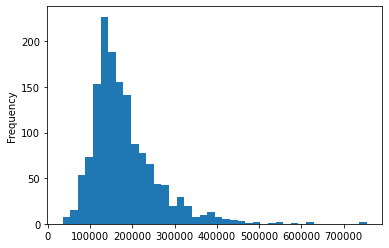

In [26]:
train_c['SalePrice'].plot.hist(bins=40)

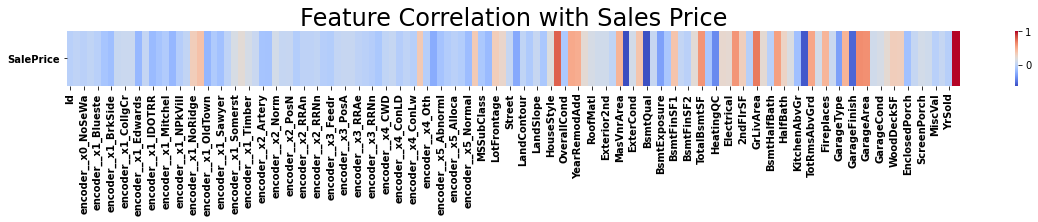

In [27]:
# Correlation heatmap and dataframe

num = train_c
numcorr = num.corr()
f,ax=plt.subplots(figsize=(20,1))
sns.heatmap(numcorr.sort_values(by=['SalePrice'], ascending=False).head(1), cmap="coolwarm")
plt.title("Feature Correlation with Sales Price", fontsize=24)
plt.xticks(weight='bold')
plt.yticks(weight='bold', rotation=0)


plt.show()


In [28]:
df_corr = numcorr['SalePrice'].sort_values(ascending=False).head(10).to_frame()
df_corr

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


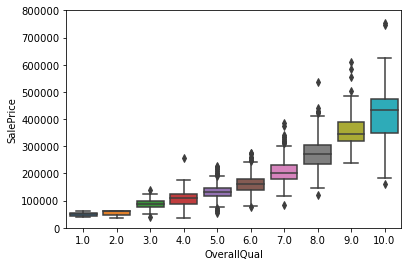

In [29]:
#Now we want to explore the correlated features to check if there is any necessary cleaning

# Overall Quality vs Sale Price
#We can see the people generally pay more for overall quality
#Because this makes sense, I'd leave it alone

data = pd.concat([train_c['SalePrice'], train_c['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

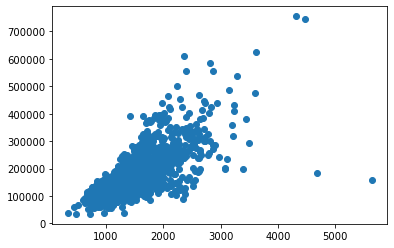

In [30]:
#Now lets take a look at the relationship between Sale Price and Square Footage
#The two observations over 4000 sqft, but less than $300k are outliers we will want to remove

plt.scatter(x=train_c['GrLivArea'], y=train_c["SalePrice"]);

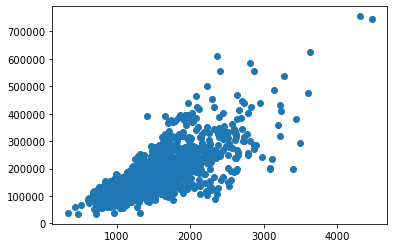

In [31]:
# Removing outliers manually (Two points in the bottom right)
train_c = train_c.drop(train_c[(train_c['GrLivArea']>4000) & (train_c['SalePrice']<300000)].index).reset_index(drop=True)
plt.scatter(x=train_c['GrLivArea'], y=train_c["SalePrice"]);

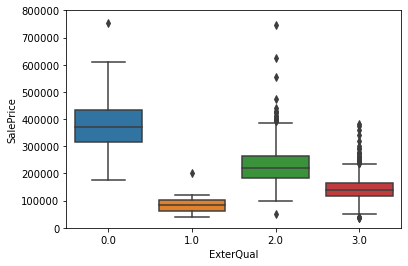

In [32]:
#ExterQual vs SalePrice
#looks good!

data1 = pd.concat([train_c['SalePrice'], train_c['ExterQual']], axis=1)
f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x='ExterQual', y="SalePrice", data=data1)
fig.axis(ymin=0, ymax=800000);

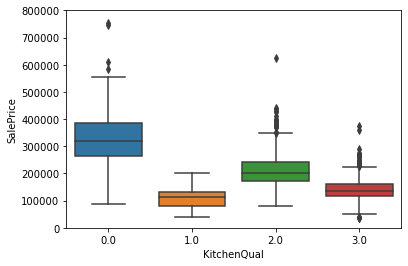

In [33]:
#KitchenQual vs SalePrice
#looks good here

data1 = pd.concat([train_c['SalePrice'], train_c['KitchenQual']], axis=1)
f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x='KitchenQual', y="SalePrice", data=data1)
fig.axis(ymin=0, ymax=800000);

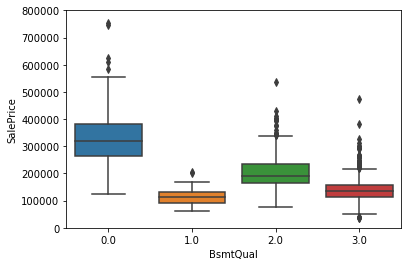

In [34]:
#BsmtQual vs SalePrice
#looks good here

data1 = pd.concat([train_c['SalePrice'], train_c['BsmtQual']], axis=1)
f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x='BsmtQual', y="SalePrice", data=data1)
fig.axis(ymin=0, ymax=800000);

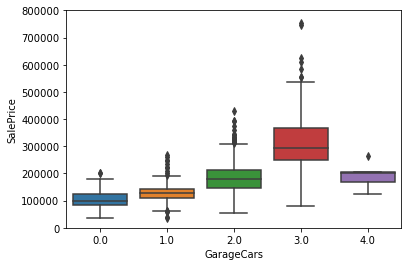

In [35]:
#GarageCars vs SalePrice

data1 = pd.concat([train_c['SalePrice'], train_c['GarageCars']], axis=1)
f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x='GarageCars', y="SalePrice", data=data1)
fig.axis(ymin=0, ymax=800000);

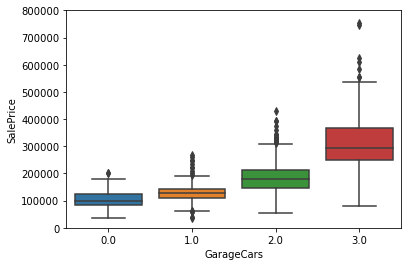

In [36]:
#It doesn't make sense that garages that can fit 4 cars would cost less
#Lets take those out of the data set
train_c = train_c.drop(train_c[train_c['GarageCars'] > 3].index).reset_index(drop=True)
data1 = pd.concat([train_c['SalePrice'], train_c['GarageCars']], axis=1)
f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x='GarageCars', y="SalePrice", data=data1)
fig.axis(ymin=0, ymax=800000);

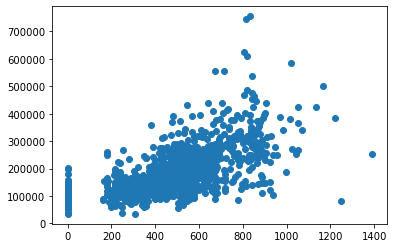

In [37]:
#GarageArea vs SalePrice

plt.scatter(x=train_c['GarageArea'], y=train_c["SalePrice"]);

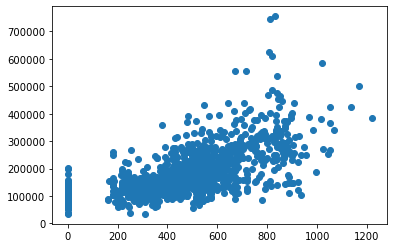

In [38]:
#Removing outliers manually (Two points in the bottom right)
#The observations with 0 square footage are probably houses that don't have a basement.
#This can be taken care of later when cleaning the data

train_c = train_c.drop(train_c[(train_c['GarageArea']>1200) & (train_c['SalePrice']<300000)].index).reset_index(drop=True)
plt.scatter(x=train_c['GarageArea'], y=train_c["SalePrice"]);

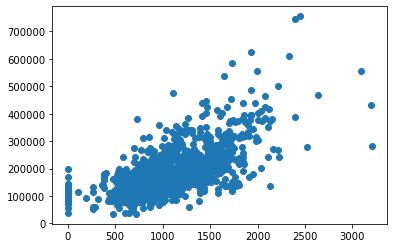

In [39]:
#Basement Square Footage vs Sale Price
#Looks good! No need to remove any outliers

plt.scatter(x=train_c['TotalBsmtSF'], y=train_c["SalePrice"]);

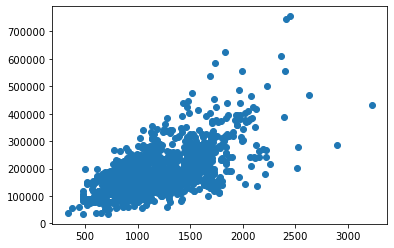

In [40]:
#First Floor Square Footage vs Sale Price
#Looks good! No need to remove any outliers

plt.scatter(x=train_c['1stFlrSF'], y=train_c["SalePrice"]);

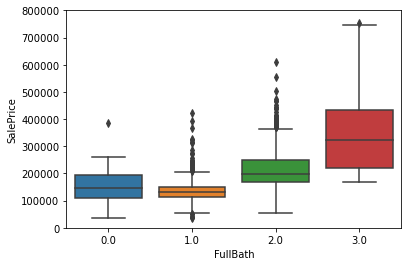

In [41]:
#Number of Full Baths vs Sale Price
#The houses with 0 full baths have slightly larger prices than house with 1, but that is probably due to other factors
#No need to remove outliers because the houses with 1-3 are appropriately spread

data2 = pd.concat([train_c['SalePrice'], train_c['FullBath']], axis=1)
f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x='FullBath', y="SalePrice", data=data2)
fig.axis(ymin=0, ymax=800000);

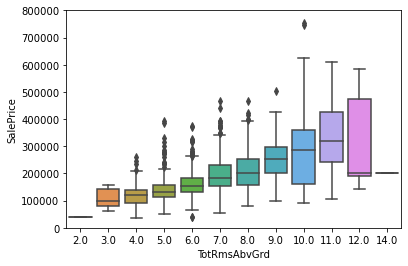

In [42]:
#Total rooms above ground vs sales price
data3 = pd.concat([train_c['SalePrice'], train_c['TotRmsAbvGrd']], axis=1)
f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x='TotRmsAbvGrd', y="SalePrice", data=data3)
fig.axis(ymin=0, ymax=800000);

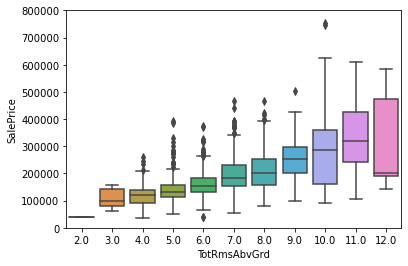

In [43]:
#Houses with 14 rooms above ground are priced lower. Let's remove that 

train_c = train_c.drop(train_c[train_c['TotRmsAbvGrd'] > 13].index).reset_index(drop=True)
data3 = pd.concat([train_c['SalePrice'], train_c['TotRmsAbvGrd']], axis=1)
f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x='TotRmsAbvGrd', y="SalePrice", data=data3)
fig.axis(ymin=0, ymax=800000);

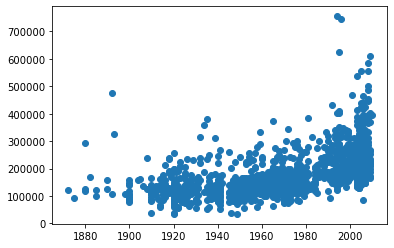

In [44]:
#YearBuilt vs SalePrice

plt.scatter(x=train_c['YearBuilt'], y=train_c["SalePrice"]);

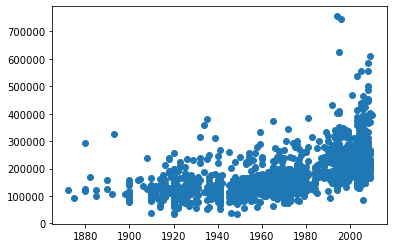

In [45]:
#Lets get rid of the house that was built in the 1800s but almost $500K

train_c = train_c.drop(train_c[(train_c['YearBuilt']<1900) & (train_c['SalePrice']>400000)].index).reset_index(drop=True)
plt.scatter(x=train_c['YearBuilt'], y=train_c["SalePrice"]);

In [46]:
#Final overview of cleaned data
train_c.head(10)

,Id,encoder__x0_AllPub,encoder__x0_NoSeWa,encoder__x1_Blmngtn,encoder__x1_Blueste,encoder__x1_BrDale,encoder__x1_BrkSide,encoder__x1_ClearCr,encoder__x1_CollgCr,encoder__x1_Crawfor,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
5,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,30.0,0.0,320.0,0.0,0.0,700.0,10.0,2009.0,143000.0
6,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,57.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,307000.0
7,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,235.0,204.0,228.0,0.0,0.0,0.0,350.0,11.0,2009.0,200000.0
8,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,90.0,0.0,205.0,0.0,0.0,0.0,0.0,4.0,2008.0,129900.0
9,10.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,2008.0,118000.0


# Split and Scale Data for Training

In [47]:
#Create dependent variable and independent variables

from sklearn.model_selection import train_test_split

X = train_c.drop(['SalePrice'], axis = 1)
y = train_c['SalePrice']

#split data into a training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [48]:
# Robust Scalar

from sklearn.preprocessing import RobustScaler

scaler= RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression Model

In [49]:
# Defining functions to evaluate model perfromance

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn.model_selection as ms
from sklearn.metrics import mean_absolute_error


def model_performance(test_labels, predicted_y):
    mse = round(mean_squared_error(test_labels, predicted_y), 2)
    rmse = round(mean_squared_error(test_labels, predicted_y, squared=False), 2)
    mae = round(mean_absolute_error(test_labels, predicted_y), 2)
    print("MSE:", mse)
    print("RSME:", rmse)
    print("MAE:", mae)
    print("\n")
    
    return 

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Mape:', mape)
    print('Accuracy = {:0.2f}%.'.format(accuracy), "\n")
    
    return accuracy



In [50]:
from sklearn.linear_model import LinearRegression

# Instantiate model:
linreg = LinearRegression()


#Fit linear regression to training data, then predict on test data.

linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

# evaluate performance metrics

model_performance(y_test, y_pred)

evaluate(linreg, X_test, y_test)

r2 = round(linreg.score(X_test, y_test), 4)
print("R2:", r2)

MSE: 482792812.28
RSME: 21972.55
MAE: 15575.63


Model Performance
Average Error: 15575.6301 degrees.
Mape: 9.924116569945635
Accuracy = 90.08%. 

R2: 0.8852


# XGBoost Model

In [51]:
import xgboost as xg 

# Instantiate model
xgb_r = xg.XGBRegressor(n_estimators = 200, seed = 42,colsample_bytree=0.4,gamma=0,learning_rate=0.07, max_depth=3,min_child_weight=1.5)

#Fit model to training data, then predict on test data.

xgb_r.fit(X_train,y_train)

y_pred = xgb_r.predict(X_test)

# evaluate performance metrics

model_performance(y_test, y_pred)

evaluate(xgb_r, X_test, y_test)

r2 = round(xgb_r.score(X_test, y_test), 4)
print("R2:", r2)




MSE: 347757210.8
RSME: 18648.25
MAE: 13148.65


Model Performance
Average Error: 13148.6547 degrees.
Mape: 8.573904166047832
Accuracy = 91.43%. 

R2: 0.9173


# Hyperparameter Tuning XGBoost Model

In [52]:
random_grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
             "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
             "min_child_weight" : [ 1, 3, 5, 7 ],
             "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
             "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ], 
             "n_estimators": [50, 100, 150, 200, 250, 300, 350, 400]}


In [53]:
#Random Search Training

from sklearn.model_selection import RandomizedSearchCV

# Use the random grid to search for best hyperparameters
# First create the base model to tune
xgbr = xg.XGBRegressor(n_estimators = 200, seed = 42,colsample_bytree=0.4,gamma=0,learning_rate=0.07, max_depth=3,min_child_weight=1.5)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xgb_random = RandomizedSearchCV(estimator = xgbr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
xgb_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.4, gamma=0,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=0.07,
                                          max_delta_step=None, max_depth=3,
                                          min_child_weight=1.5, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=200, n_jobs=No...
                                          subsample=None, tree_method=None,
                                          validate_parameters=None,
                                          verb

In [54]:
xgb_random.best_params_

{'n_estimators': 300,
 'min_child_weight': 5,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [55]:
#Evaluate Random Search Findings



base_model = xg.XGBRegressor(n_estimators = 200, seed = 42,colsample_bytree=0.4,gamma=0,learning_rate=0.07, max_depth=3,min_child_weight=1.5)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = xgb_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 13148.6547 degrees.
Mape: 8.573904166047832
Accuracy = 91.43%. 

Model Performance
Average Error: 12612.7957 degrees.
Mape: 8.298648401464567
Accuracy = 91.70%. 

Improvement of 0.30%.


# Voting Regressor Model

In [56]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [57]:
# Instantiate individual models thhat will be used for the voting regressor model.

knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
lr = LinearRegression()
rf = RandomForestRegressor()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
ridge = Ridge()
svr = SVR(kernel='linear')
gbr = GradientBoostingRegressor()
lasso = Lasso()

In [58]:
# Istantiate voting regressor model

vr = VotingRegressor(
    estimators=[('rf', rf), ('lgbm', lgbm),('lasso',lasso), 
               ('xgb', xgb), ('lr', lr), ('gbr', gbr)])

#Fit model to training data, then predict on test data

vr.fit(X_train, y_train)

y_pred = vr.predict(X_test)


# evaluate performance metrics

model_performance(y_test, y_pred)

evaluate(vr, X_test, y_test)

r2 = round(vr.score(X_test, y_test), 4)
print("R2:", r2)

MSE: 320930383.73
RSME: 17914.53
MAE: 12139.19


Model Performance
Average Error: 12139.1879 degrees.
Mape: 7.990887030414981
Accuracy = 92.01%. 

R2: 0.9237


# Save XGBoost and VotingRegressor Models

In [59]:
#Save XGBoost Model with hyperparamter tuning 

xgb_model = best_random  
xgb_model.fit(X_train, y_train)

#Save voting regressor model

vr_model = VotingRegressor(
    estimators=[('rf', rf),  ('dt', dt),('lgbm', lgbm),('ridge',ridge), 
               ('svr', svr),('xgb', xgb)])

vr_model.fit(X_train, y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('dt', DecisionTreeRegressor()),
                            ('lgbm', LGBMRegressor()), ('ridge', Ridge()),
                            ('svr', SVR(kernel='linear')),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constr

In [60]:
import pickle

filename = 'xgb_model'
pickle.dump(xgb_model, open(filename, 'wb'))

import pickle
filename = 'votreg_model'
pickle.dump(vr_model, open(filename, 'wb'))

# Predict and Evaluate Winning Model on Test Data

In [61]:
# Preprocess test data

test = pd.read_csv('test.csv')

In [62]:
# Adding sales price column in order to make the test features match the number of features in the training dataset.

saleprices = [0] * 1459
test['SalePrice'] = saleprices

In [63]:
# Removing features where more than 80% of the data is missing.

test = test.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])

In [64]:
# Imputing missing values and checking

test = impute_missing(test)
test.isnull().sum().max()

0

In [65]:
# Ordinal data encoding

ordinal_encode(test)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461.0,20.0,2.0,80.0,11622.0,1.0,3.0,3.0,AllPub,4.0,...,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,WD,Normal,0.0
1,1462.0,20.0,3.0,81.0,14267.0,1.0,0.0,3.0,AllPub,0.0,...,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,WD,Normal,0.0
2,1463.0,60.0,3.0,74.0,13830.0,1.0,0.0,3.0,AllPub,4.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,WD,Normal,0.0
3,1464.0,60.0,3.0,78.0,9978.0,1.0,0.0,3.0,AllPub,4.0,...,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,WD,Normal,0.0
4,1465.0,120.0,3.0,43.0,5005.0,1.0,0.0,1.0,AllPub,4.0,...,0.0,0.0,144.0,0.0,0.0,1.0,2010.0,WD,Normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915.0,160.0,4.0,21.0,1936.0,1.0,3.0,3.0,AllPub,4.0,...,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,WD,Normal,0.0
1455,2916.0,160.0,4.0,21.0,1894.0,1.0,3.0,3.0,AllPub,4.0,...,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,WD,Abnorml,0.0
1456,2917.0,20.0,3.0,160.0,20000.0,1.0,3.0,3.0,AllPub,4.0,...,0.0,0.0,0.0,0.0,0.0,9.0,2006.0,WD,Abnorml,0.0
1457,2918.0,85.0,3.0,62.0,10441.0,1.0,3.0,3.0,AllPub,4.0,...,0.0,0.0,0.0,0.0,700.0,7.0,2006.0,WD,Normal,0.0


In [66]:
# Nominal data encoding

test_nom_cols = ['Utilities','Neighborhood','Condition1','Condition2','SaleType','SaleCondition']
#columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), test_nom_cols)], remainder='passthrough')
test = columnTransformer.transform(test)
test_column_names = columnTransformer.get_feature_names()

In [67]:
# Creating new test dataframe

test = pd.DataFrame(test)
test.columns = test_column_names

test = test[ ['Id'] + [ col for col in test.columns if col != 'Id' ] ]

In [68]:
# Removing the saleprice column that we added earlier since we don't need it to predict.

test = test.drop(['SalePrice'], axis =1)

In [69]:
test.head()

,Id,encoder__x0_AllPub,encoder__x0_NoSeWa,encoder__x1_Blmngtn,encoder__x1_Blueste,encoder__x1_BrDale,encoder__x1_BrkSide,encoder__x1_ClearCr,encoder__x1_CollgCr,encoder__x1_Crawfor,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0
1,1462.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0
2,1463.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0
3,1464.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0
4,1465.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0


In [70]:
test_X = test.values
test_X = scaler.transform(test_X)

In [71]:
# load saved models

loaded_model_vr = pickle.load(open('votreg_model', 'rb'))
loaded_model_xgb = pickle.load(open('xgb_model', 'rb'))


In [73]:
# Predict on test data with saved model

pred = loaded_model_xgb.predict(test_X)
pred

predictions = pd.DataFrame(data = pred)
predictions['Id'] = test['Id']
predictions.rename(columns = {0:"SalePrice"}, inplace = True)
predictions = predictions.astype(int)
predictions[['Id'] + ['SalePrice']]
predictions.head(10)

,SalePrice,Id
0,124642,1461
1,157988,1462
2,182929,1463
3,193711,1464
4,185520,1465
5,179466,1466
6,180445,1467
7,164397,1468
8,182176,1469
9,124586,1470


In [74]:
pred = loaded_model_vr.predict(test_X)
pred

predictions = pd.DataFrame(data = pred)
predictions['Id'] = test['Id']
predictions.rename(columns = {0:"SalePrice"}, inplace = True)
predictions = predictions.astype(int)
predictions[['Id', 'SalePrice']]
predictions.head(10)

,SalePrice,Id
0,141222,1461
1,160031,1462
2,171976,1463
3,171562,1464
4,192330,1465
5,167129,1466
6,174872,1467
7,161505,1468
8,180659,1469
9,129331,1470


In [ ]:
#Export to CSV
predictions.to_csv('final_predictions.csv')